# Boston Housing Analysis

## Introduction
**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

 - Is there a significant difference in the median value of houses bounded by the Charles river or not?
 - Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
 - Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
 - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

### Task 1: Familiarize Yourself with the Dataset

#### 1.1 Load and Examine the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### 1.2 Reading the data of the CSV file from the URL

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL, index_col=0)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### 1.4 Taking a look at the summary statistics

In [3]:
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

#### 1.5 Checking for any missing values

In [4]:
print(boston_df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


##

### Task 2: Generate Descriptive Statistics and Visualizations

In [5]:
sns.set_palette('Set3')

#### 2.1 Boxplot for "Median value of owner-occupied homes"

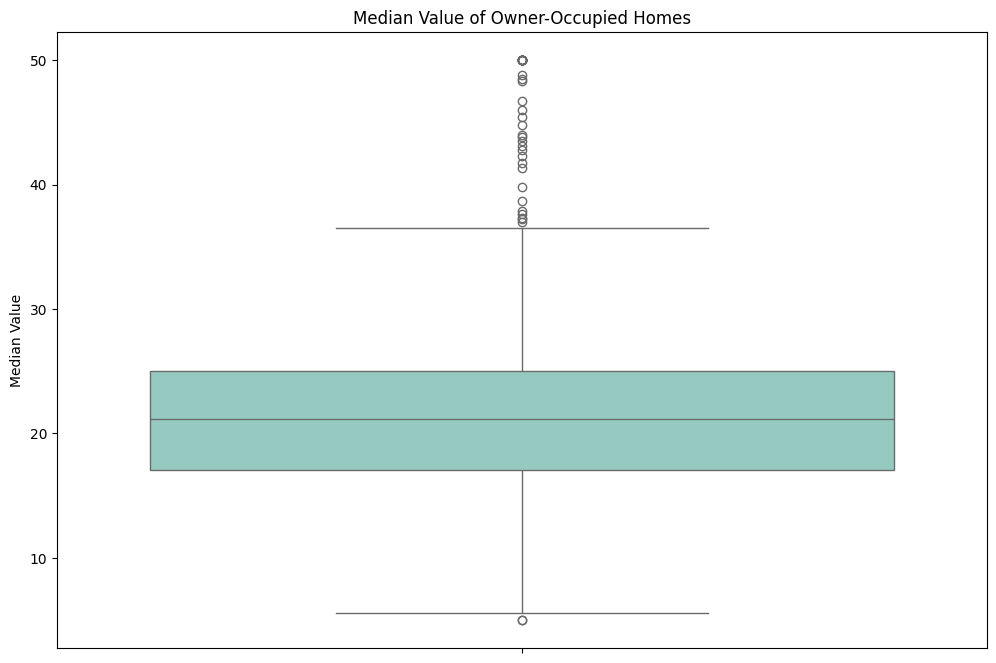

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value')
plt.show()

##

#### 2.2 Bar Plot for the Charles River Variable

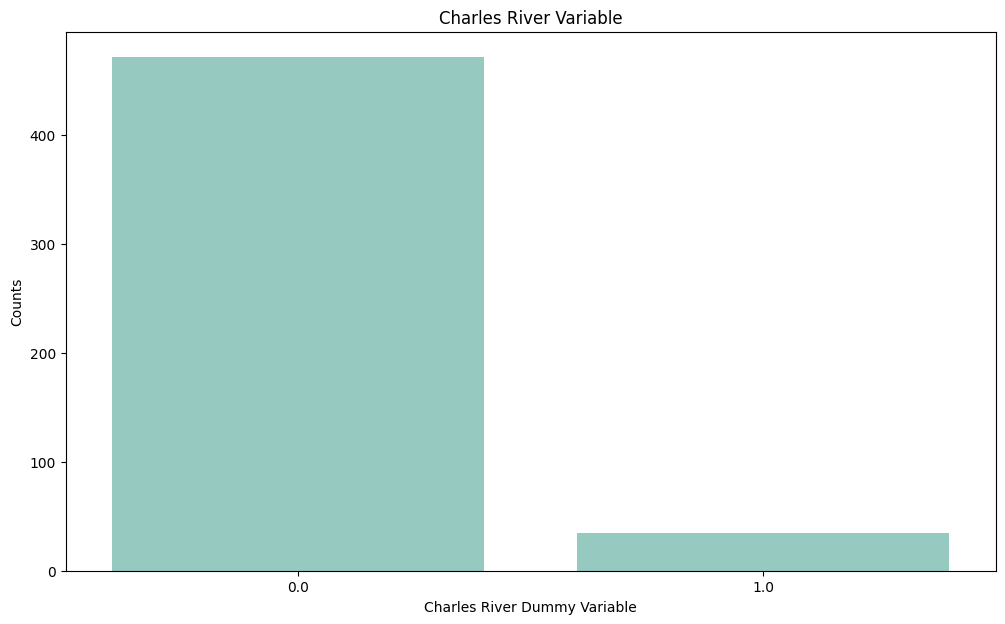

In [7]:
plt.figure(figsize=(12, 7))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Charles River Variable')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Counts')
plt.show()

##

#### 2.3 Boxplot for MEDV vs. AGE (Discretized)

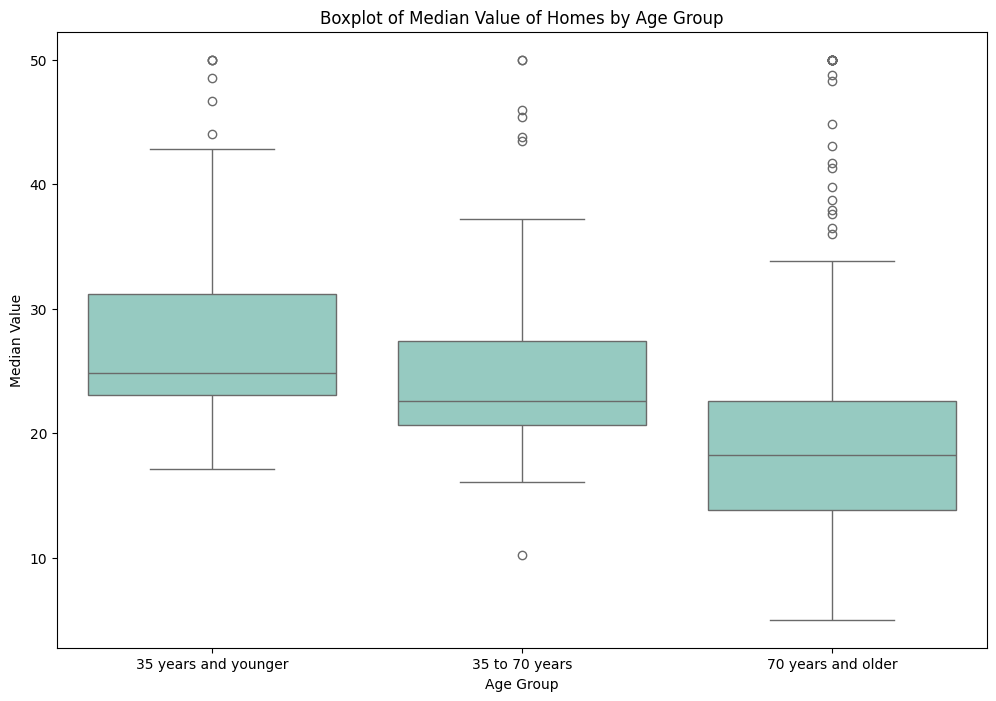

In [8]:
# Discretize AGE into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.show()

##

#### 2.4 Scatter Plot for Nitric Oxide vs. Non-Retail Business Acres

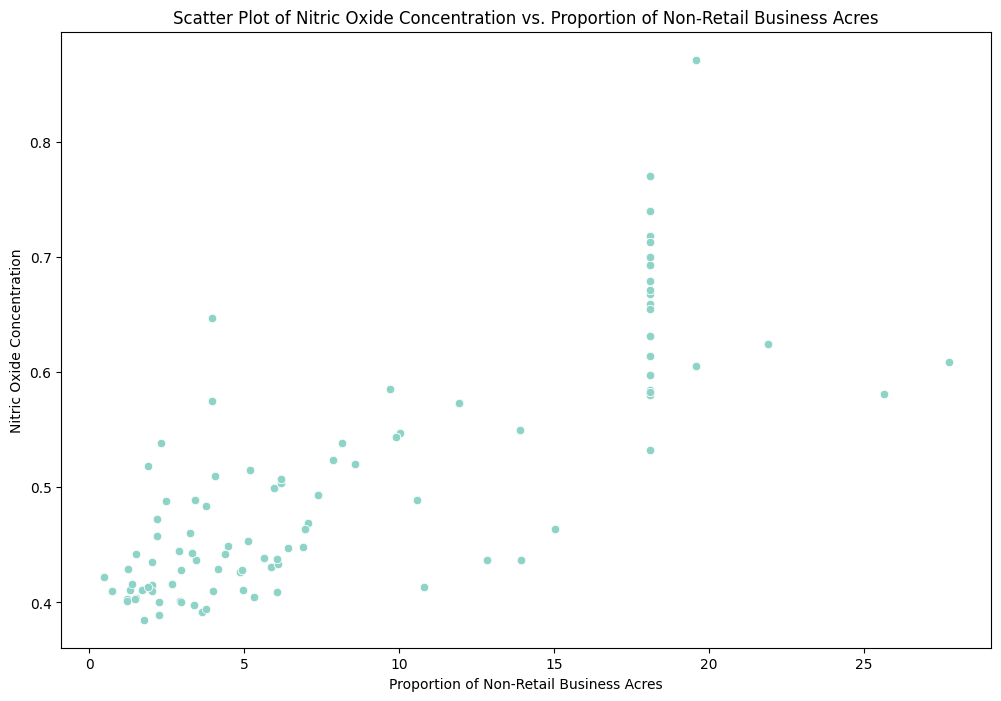

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentration vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentration')
plt.show()

##

#### 2.5 Histogram for Pupil-Teacher Ratio

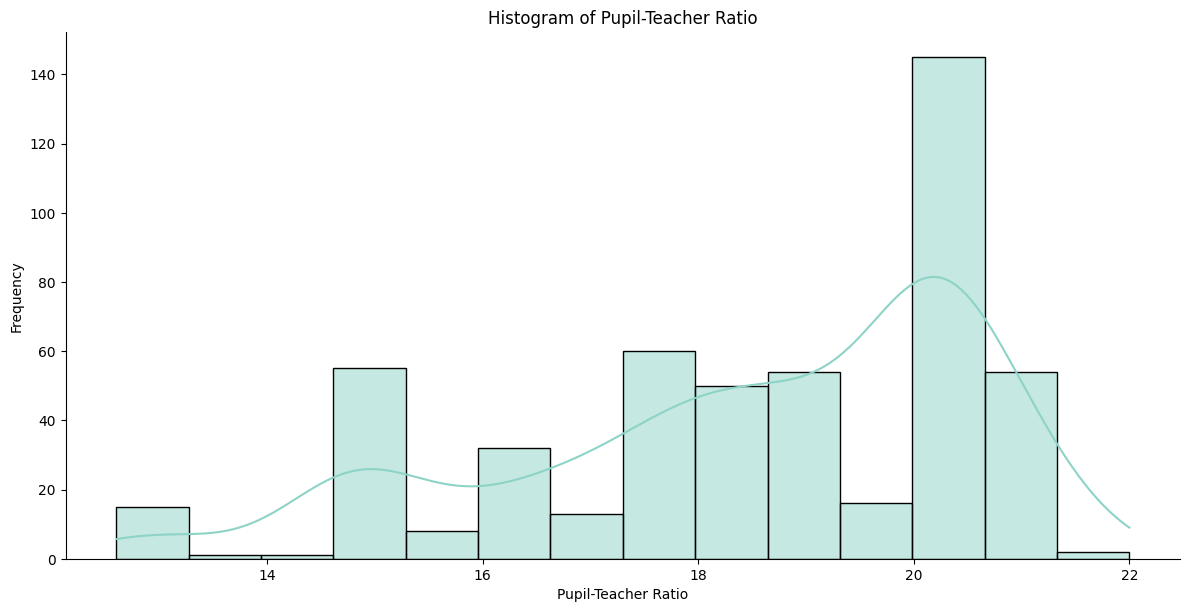

In [10]:
sns.displot(boston_df['PTRATIO'], kde=True, height=6, aspect=2)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

##

### Task 3: Use the Appropriate Tests

#### 3.1 T-test for Charles River Variable
**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: There is no significant difference in median values of houses bounded by the Charles River.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a significant difference in median values of houses bounded by the Charles River.

In [11]:
# T-test for Charles River Variable
from scipy import stats

# Separate data based on CHAS
river_data = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_data = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = stats.ttest_ind(river_data, not_river_data)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference.


##

#### 3.2 Perform ANOVA for Proportion of Owner-Occupied Units Built Before 1940
**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: All groups have the same median value of homes.
- **Alternative Hypothesis (H<sub>1</sub>)**: At least one group has a different median value.

In [12]:
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


##

#### 3.3 Pearson Correlation for Nitric Oxide and Non-Retail Business Acres
**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: There is no correlation between NOX and INDUS.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a correlation between NOX and INDUS.

In [13]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation coefficient: {corr}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Correlation coefficient: 0.7636514469209151, P-value: 7.913361061239527e-98
Reject the null hypothesis: There is a significant correlation.


# 

#### 3.4 Regression Analysis for Distance to Employment Centers

**Hypothesis:**

- **Null Hypothesis (H<sub>0</sub>)**: The weighted distance to employment centers has no impact on median home value.
- **Alternative Hypothesis (H<sub>1</sub>)**: The weighted distance to employment centers impacts the median home value.

In [14]:
# Define the model
model = sm.OLS(boston_df['MEDV'], sm.add_constant(boston_df['DIS'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        19:15:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##